In [1]:
#!/opt/conda/envs/lae2020/bin/python3

from importlib.abc import Loader
import sys
import os
import ruamel.yaml

sys.path.insert(0,"/home/chinahg/GCresearch/cantera/build/python")
sys.path.insert(1,"/home/chinahg/GCresearch/rocketemissions")

import cantera as ct
ct.add_directory('/user/chinahg')
ct.__file__

import h5py
import numpy as np
import time
import math as math
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize

from combustion_chamber import *
from shocks import *
from nozzle import *
from SSME import *

import yaml
loader=yaml.Loader

from matplotlib.ticker import FormatStrFormatter

done! :)


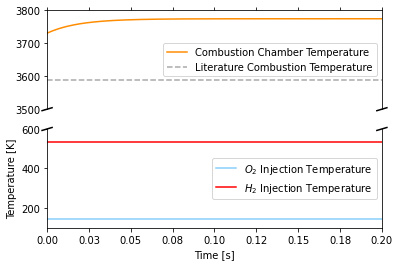

In [2]:
#COMBUSTION CHAMBER
#PLOT TEMPERATURE
T_lit = np.full((len(state.T),1),3588.7)
OxInj_T = np.full((len(state.T),1),145.9)
FuelInj_T = np.full((len(state.T),1),533.15)

f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

ax2.plot(state.t, OxInj_T, label = '$O_2$ Injection Temperature', color = 'lightskyblue')
ax2.plot(state.t, FuelInj_T, label = '$H_2$ Injection Temperature', color = 'red')
ax.plot(state.t,state.T, label = 'Combustion Chamber Temperature', color = 'darkorange')
ax.plot(state.t, T_lit, label = 'Literature Combustion Temperature', color = 'darkgray', linestyle = 'dashed')

plt.xlabel("Time [s]")
plt.ylabel("Temperature [K]")

plt.xlim([0,0.2])
ax2.set_ylim(100,600)
ax.set_ylim(3500,3800)
ax.legend()
ax2.legend()

ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.savefig("/home/chinahg/GCresearch/rocketemissions/plots/CC_T.png")

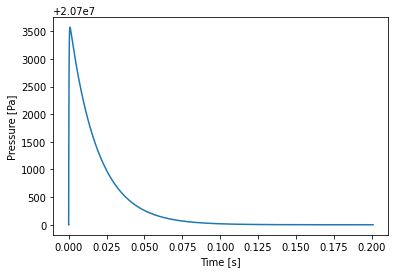

In [3]:
#PLOT PRESSURE
plt.figure()
plt.plot(state.t,state.P, label = 'Combustion Chamber Pressure')
plt.xlabel("Time [s]")
plt.ylabel("Pressure [Pa]")
plt.savefig("/home/chinahg/GCresearch/rocketemissions/plots/CC_P.png")


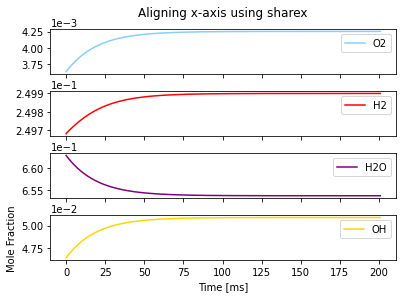

In [22]:
#PLOT MOLE FRACTION
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
fig.suptitle('Aligning x-axis using sharex')

ax1.plot(1000*state.t,state("O2").X, label="O2", color = 'lightskyblue') #O2
ax2.plot(1000*state.t,state("H2").X, label="H2", color = 'red') #H2
ax3.plot(1000*state.t,state("H2O").X, label="H2O", color = 'purple') #H2O
ax4.plot(1000*state.t,state("OH").X, label="OH", color = 'gold') #OH

ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.xlabel("Time [ms]")
plt.ylabel("Mole Fraction")
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.savefig("/home/chinahg/GCresearch/rocketemissions/plots/CC_X.png")

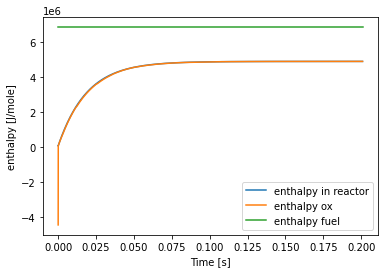

In [5]:
#PLOT ENTHALPY
plt.figure()
plt.plot(state.t,state.enthalpy, label="enthalpy in reactor")
plt.plot(state.t,state.eox, label="enthalpy ox")
plt.plot(state.t,state.efuel, label="enthalpy fuel")
plt.xlabel("Time [s]")
plt.ylabel("enthalpy [J/mole]")
plt.legend()
plt.savefig("/home/chinahg/GCresearch/rocketemissions/plots/CC_H.png")

In [ ]:
#NOZZLE
#velocity vs isentropic

#species vs isentropic

#pressure vs isentropic

#temp vs isentropic

#